导入库

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

导入训练数据和测试数据

In [3]:
train = pd.read_csv('E:\\python code\\期末大作业\\train.csv')
test = pd.read_csv('E:\\python code\\期末大作业\\test_noLabel.csv')
print(train.shape)
train.head(2)

(1100, 32)


,ID,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Label
0,0,37,Travel_Rarely,Research & Development,1,4,Life Sciences,77,1,Male,...,80,1,7,2,4,7,5,0,7,0
1,1,54,Travel_Frequently,Research & Development,1,4,Life Sciences,1245,4,Female,...,80,1,33,2,1,5,4,1,4,0


绘制相关性系数图

In [4]:
train['Label'].value_counts()

0    922
1    178
Name: Label, dtype: int64

观察是否有缺失值

In [5]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        1100 non-null   int64 
 1   Age                       1100 non-null   int64 
 2   BusinessTravel            1100 non-null   object
 3   Department                1100 non-null   object
 4   DistanceFromHome          1100 non-null   int64 
 5   Education                 1100 non-null   int64 
 6   EducationField            1100 non-null   object
 7   EmployeeNumber            1100 non-null   int64 
 8   EnvironmentSatisfaction   1100 non-null   int64 
 9   Gender                    1100 non-null   object
 10  JobInvolvement            1100 non-null   int64 
 11  JobLevel                  1100 non-null   int64 
 12  JobRole                   1100 non-null   object
 13  JobSatisfaction           1100 non-null   int64 
 14  MaritalStatus           

观察到train和test中均无缺失值

开始合并

In [6]:
data = train.append(test)
data.info()
print('合并后一共{0}条数据'.format(data.shape[0]))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 349
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        1450 non-null   int64  
 1   Age                       1450 non-null   int64  
 2   BusinessTravel            1450 non-null   object 
 3   Department                1450 non-null   object 
 4   DistanceFromHome          1450 non-null   int64  
 5   Education                 1450 non-null   int64  
 6   EducationField            1450 non-null   object 
 7   EmployeeNumber            1450 non-null   int64  
 8   EnvironmentSatisfaction   1450 non-null   int64  
 9   Gender                    1450 non-null   object 
 10  JobInvolvement            1450 non-null   int64  
 11  JobLevel                  1450 non-null   int64  
 12  JobRole                   1450 non-null   object 
 13  JobSatisfaction           1450 non-null   int64  
 14  MaritalSt

<AxesSubplot:>

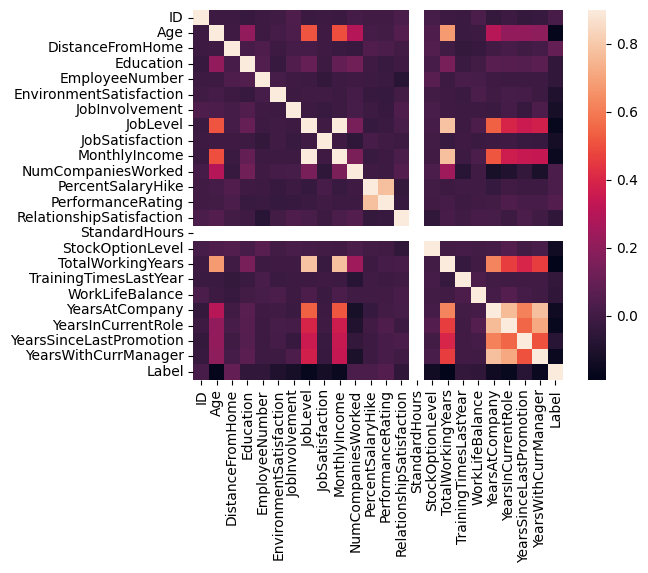

In [7]:
corrmat = data.corr()
sns.heatmap(corrmat,vmax=0.9,square = True)

观察热力图可知，StandardHours可剔除

In [8]:
data.drop(['StandardHours'],axis=1,inplace=True)

In [9]:
data.describe()

,ID,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Label
count,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,...,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.00000,1450.000000,1100.000000
mean,724.500000,36.871724,9.177241,2.909655,1026.981379,2.722759,2.731724,2.057931,2.731034,6482.624138,...,2.708276,0.795172,11.217241,2.801379,2.761379,6.956552,4.220000,2.16000,4.097931,0.161818
std,418.723258,9.119033,8.085783,1.023925,602.029616,1.090314,0.711068,1.103084,1.103074,4694.115546,...,1.082390,0.853752,7.738772,1.292009,0.706588,6.053036,3.617954,3.18867,3.546603,0.368451
min,0.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,362.250000,30.000000,2.000000,2.000000,494.250000,2.000000,2.000000,1.000000,2.000000,2909.500000,...,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.00000,2.000000,0.000000
50%,724.500000,36.000000,7.000000,3.000000,1023.000000,3.000000,3.000000,2.000000,3.000000,4903.500000,...,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.00000,3.000000,0.000000
75%,1086.750000,43.000000,14.000000,4.000000,1559.500000,4.000000,3.000000,3.000000,4.000000,8339.750000,...,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.75000,7.000000,0.000000
max,1449.000000,60.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.00000,17.000000,1.000000


观察可知，employeenumber为无用特征，可删除

In [10]:
train.drop(['EmployeeNumber'],axis = 1,inplace=True)
test.drop(['EmployeeNumber'],axis = 1,inplace=True)
data.drop(['EmployeeNumber'],axis = 1,inplace=True)

观察年龄结构

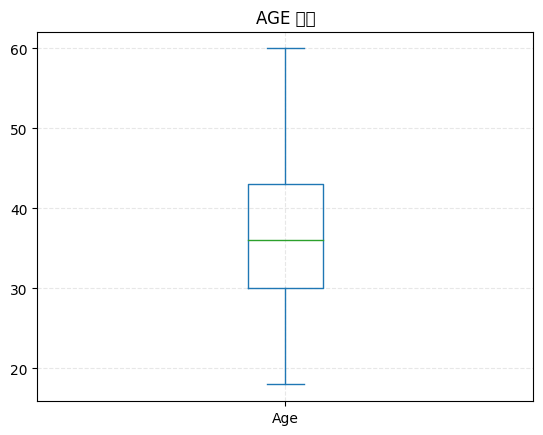

In [11]:
data['Age'].plot.box(title = "AGE 分布")
plt.grid(linestyle='--',alpha = 0.3)
plt.show()

观察可知，大于十八岁为无用特征，可删除

In [12]:
train.drop(['Over18'],axis = 1,inplace=True)
test.drop(['Over18'],axis = 1,inplace=True)
data.drop(['Over18'],axis = 1,inplace=True)

对部分特征进行可视化

1.距离家的距离

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Label'>

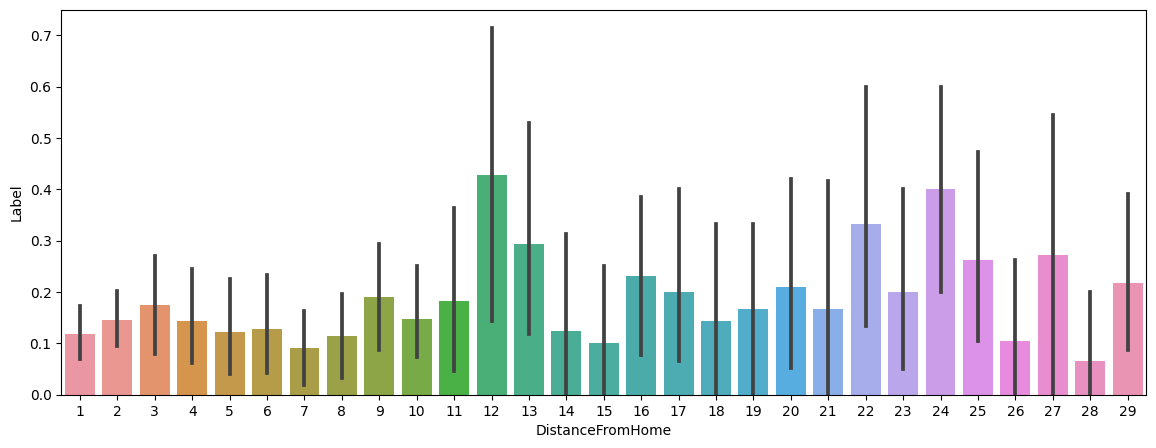

In [13]:
plt.figure(figsize=(14,5))
sns.barplot(x='DistanceFromHome',y='Label',data=train)

2.教育

<AxesSubplot:xlabel='Education', ylabel='Label'>

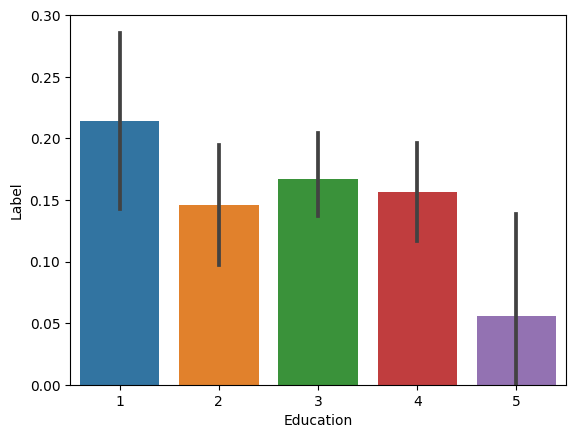

In [14]:
sns.barplot(x='Education',y='Label',data=train)

学历越低离职率越高

3.环境满意度和工作满意度

Text(0.5, 1.0, 'JobSatisfaction')

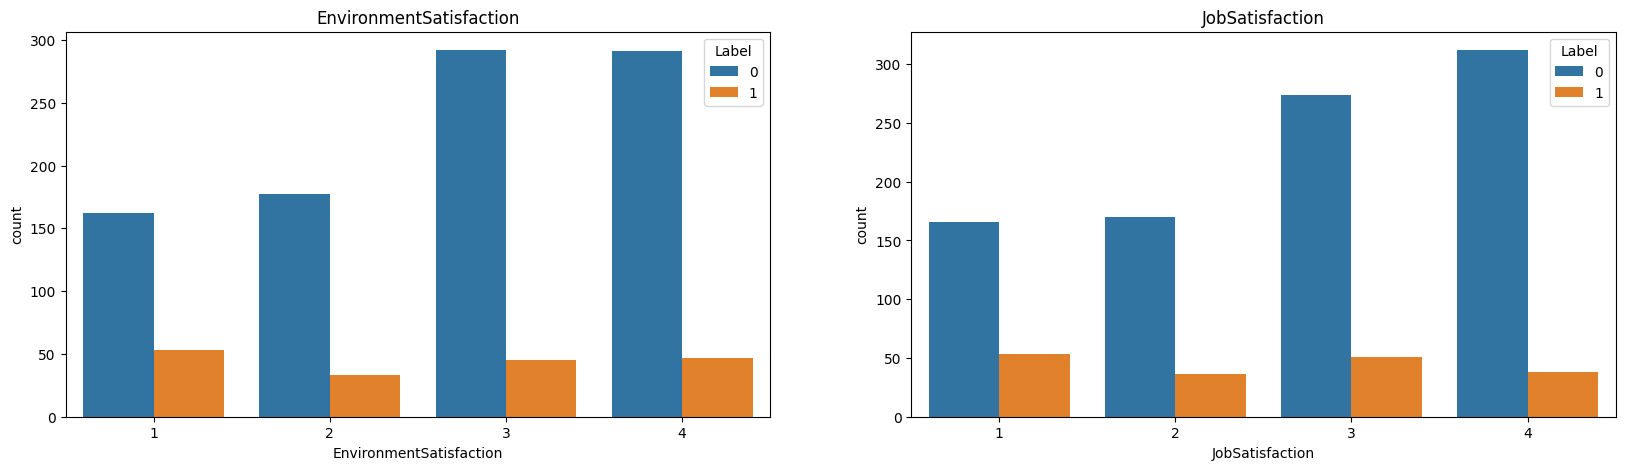

In [15]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(20,5))
sns.countplot(x='EnvironmentSatisfaction',hue='Label',data=train,ax=ax1)
sns.countplot(x='JobSatisfaction',hue='Label',data=train,ax=ax2)
ax1.set_title('EnvironmentSatisfaction')
ax2.set_title('JobSatisfaction')


Text(0.5, 1.0, 'JobSatisfaction')

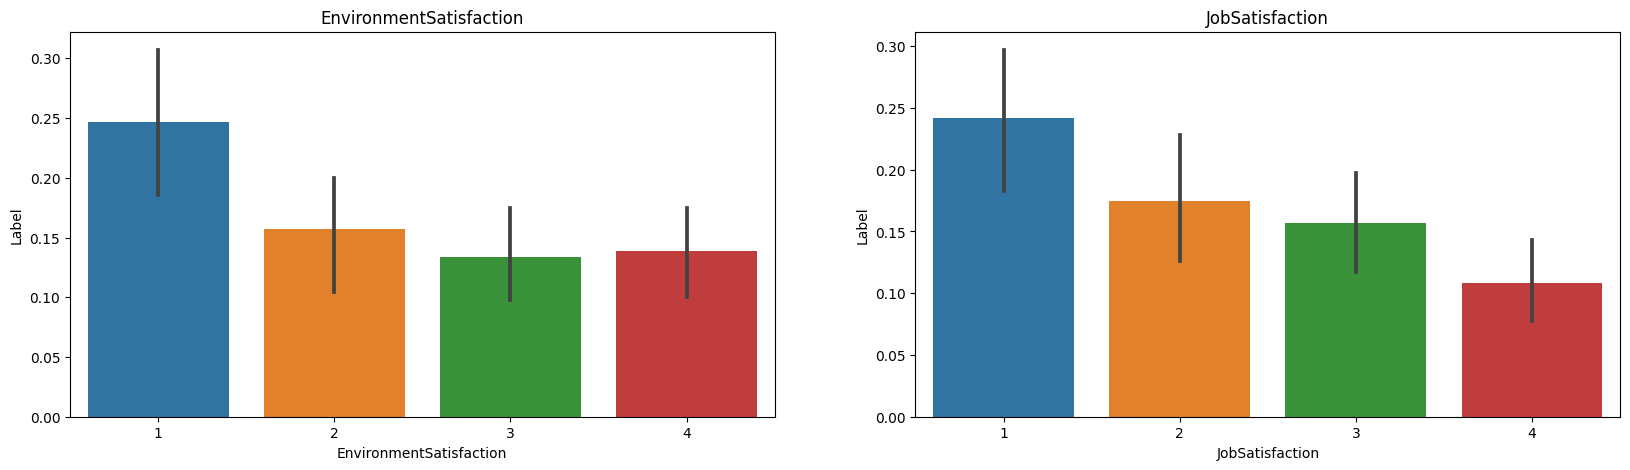

In [17]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(20,5))
sns.barplot(x='EnvironmentSatisfaction',y='Label',data=train,ax=ax1)
sns.barplot(x='JobSatisfaction',y='Label',data=train,ax=ax2)
ax1.set_title('EnvironmentSatisfaction')
ax2.set_title('JobSatisfaction')

满意度越高离职率越低

4.工作与生活平衡程度

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='Label'>

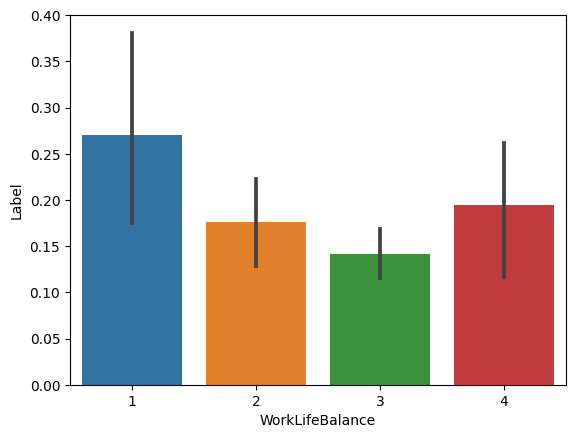

In [18]:
sns.barplot(x='WorkLifeBalance',y='Label',data=train)

平衡程度一般的员工离职率更低（？？？）

5.不同部门离职率分析

<AxesSubplot:xlabel='Department', ylabel='Label'>

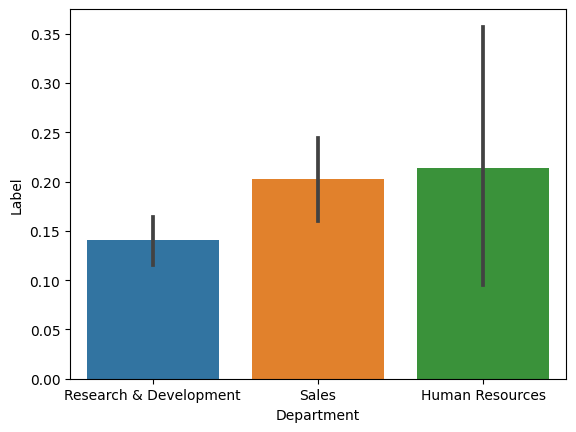

In [19]:
sns.barplot(x='Department',y='Label',data=train)

如图所示

6.出差频率分析

<AxesSubplot:xlabel='BusinessTravel', ylabel='Label'>

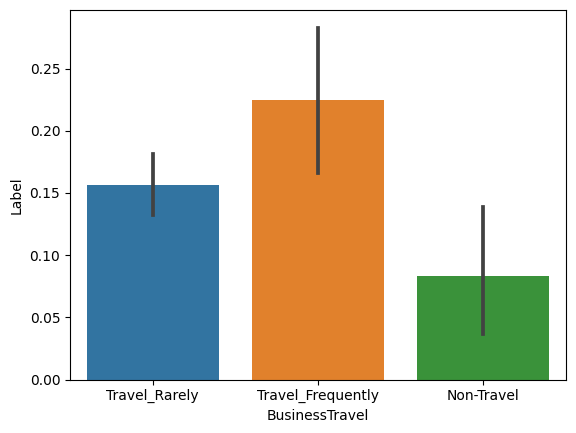

In [20]:
sns.barplot(x='BusinessTravel',y='Label',data=train)

出差最频繁的离职率最高

7.性别离职率分析

<AxesSubplot:xlabel='Gender', ylabel='Label'>

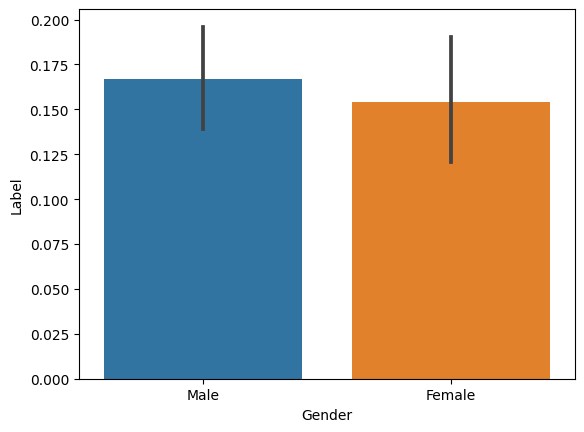

In [21]:
sns.barplot(x='Gender',y='Label',data=train)

男性离职率偏高

8.工作角色离职率可视化

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Manufacturing Director'),
  Text(1, 0, 'Laboratory Technician'),
  Text(2, 0, 'Sales Executive'),
  Text(3, 0, 'Research Scientist'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Human Resources'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Manager')])

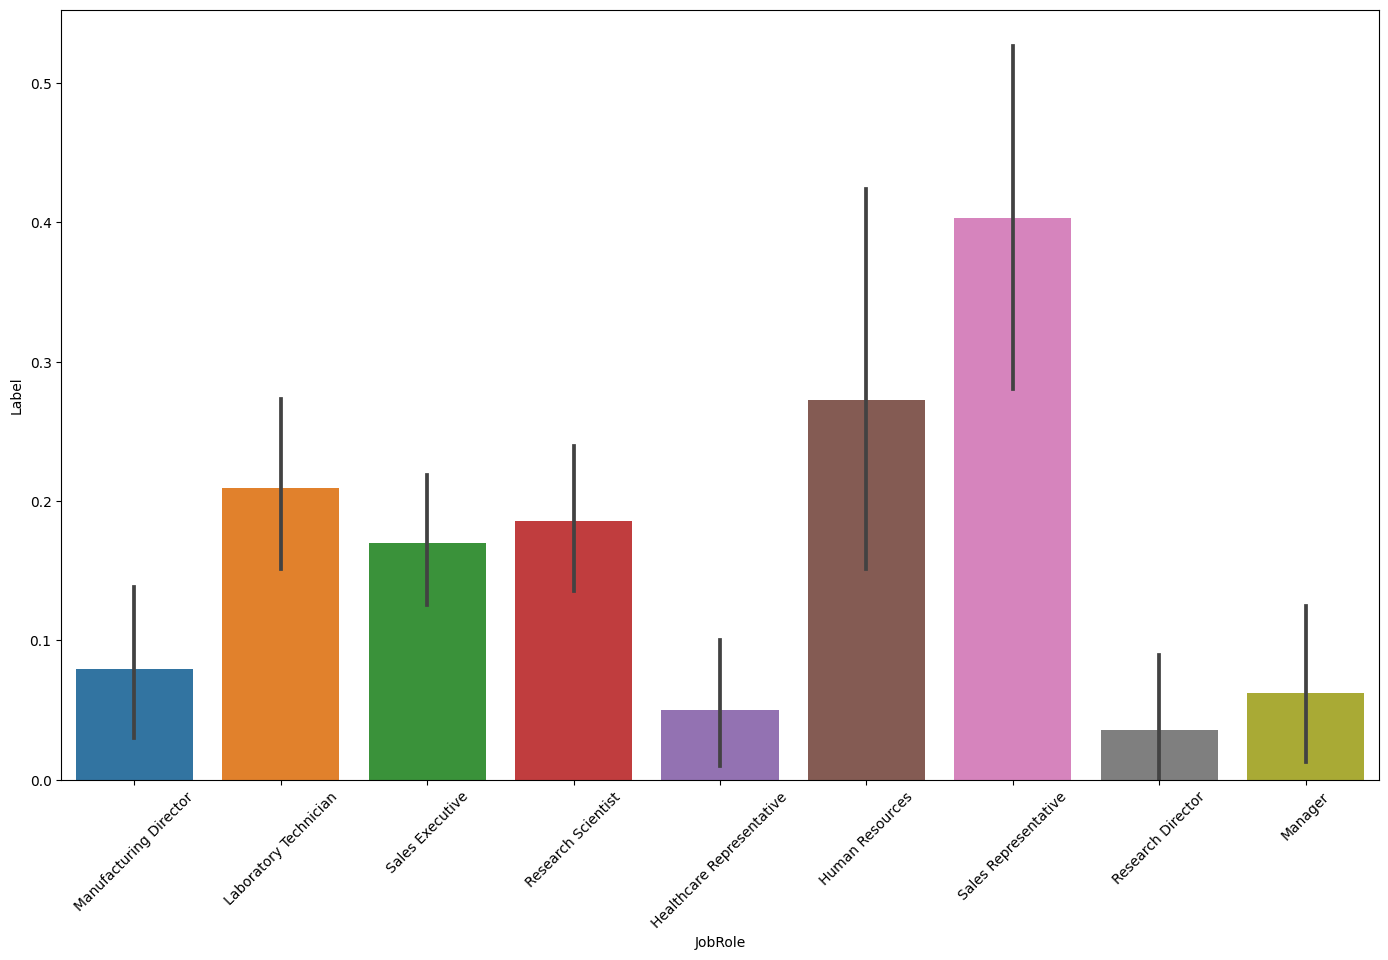

In [26]:
f,ax=plt.subplots(1,1,figsize=(17,10))
sns.barplot(x='JobRole',y='Label',data=train)
plt.xticks(rotation=45)

销售代表离职率最高

9.员工曾经工作过的公司数离职率分析

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Label'>

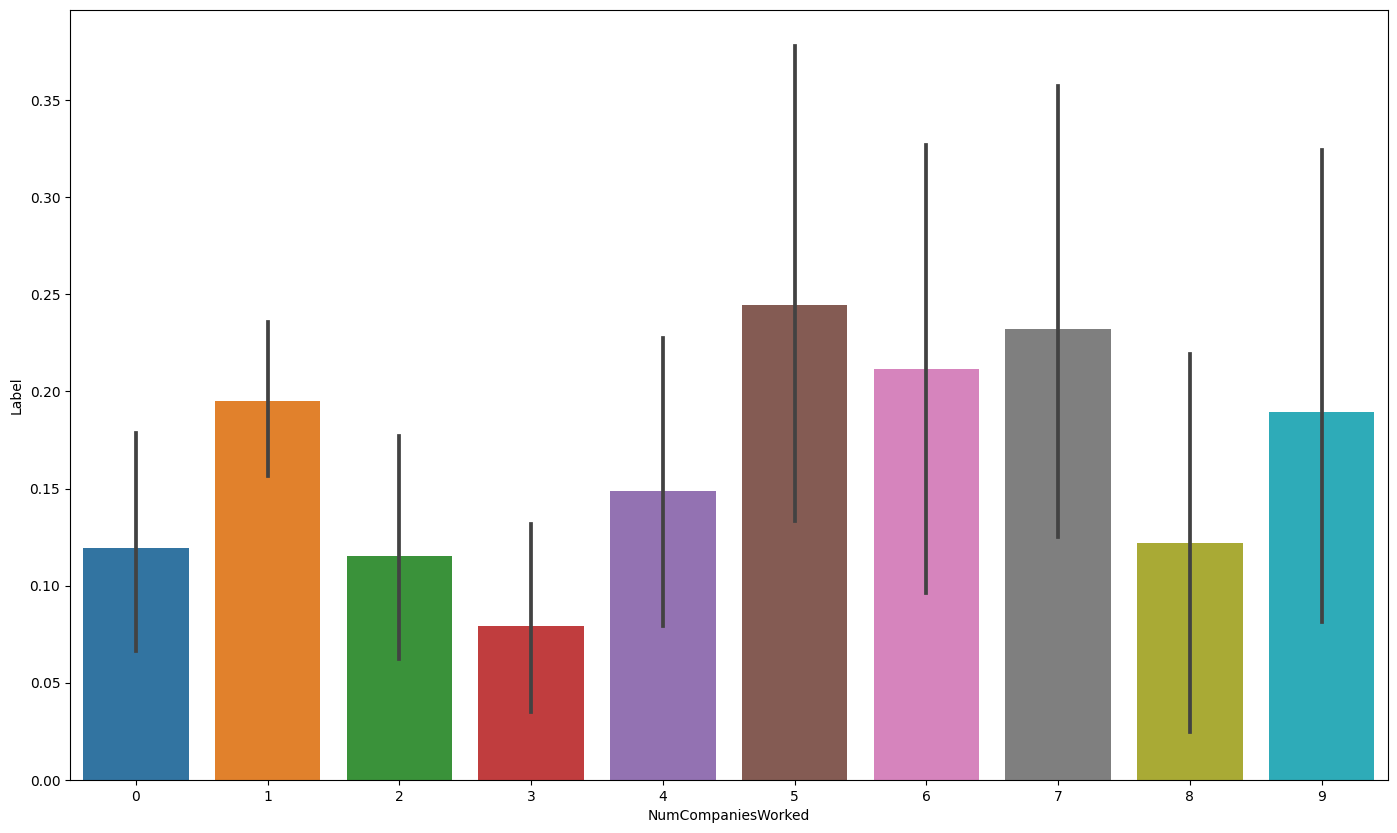

In [27]:
f,ax=plt.subplots(1,1,figsize=(17,10))
sns.barplot(x='NumCompaniesWorked',y='Label',data=train)

10.培训时长离职率可视化分析

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='Label'>

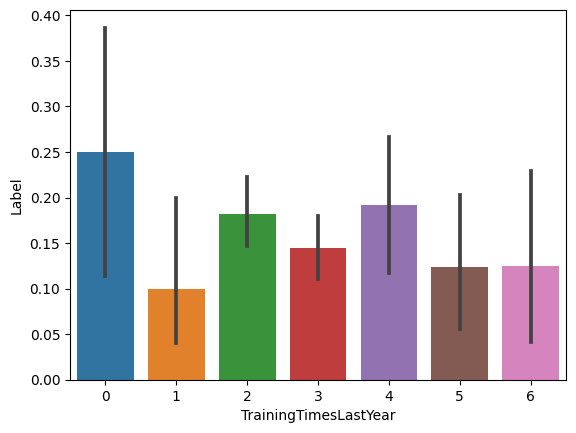

In [28]:
sns.barplot(x='TrainingTimesLastYear',y='Label',data=train)

无培训的离职率最高

对Object进行独热编码

In [283]:
cata_result = pd.DataFrame()
for i in data.columns:
    if data[i].dtype == 'O':
        cata = pd.DataFrame()
        cata = pd.get_dummies(data[i],prefix=i)
        cata_result = pd.concat([cata_result,cata],axis=1)

编码后，删除object变量

In [284]:
for i in data.columns:
    if data[i].dtype == 'O':
        data = data.drop(i,axis=1)

进行合并

In [285]:
data = pd.concat([data,cata_result],axis=1)

In [286]:
data.head()

,ID,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,37,1,4,1,2,2,3,5993,1,...,1,0,0,0,0,1,0,0,1,0
1,1,54,1,4,4,3,3,3,10502,7,...,1,0,0,0,0,1,0,0,1,0
2,2,34,7,3,1,1,2,3,6074,1,...,0,0,0,0,0,0,0,1,0,1
3,3,39,1,1,4,2,4,4,12742,1,...,1,0,0,0,0,0,1,0,1,0
4,4,28,1,3,1,2,1,2,2596,1,...,0,0,0,0,0,1,0,0,1,0


接下来对连续变量进行一定的处理，目的是防止过拟合

观察各个int类型的离职率

In [287]:
#越年轻离职率相对越高；教育程度越低离职率也相对较高；
for i in train.columns:
    if train[i].dtype=='int64':
        print(i+':')
        print((train[train['Label'] == 1.0][i].value_counts()/train[i].value_counts()).sort_values(ascending = False))

ID:
2       1.0
837     1.0
688     1.0
695     1.0
697     1.0
       ... 
1092    NaN
1094    NaN
1095    NaN
1096    NaN
1097    NaN
Name: ID, Length: 1100, dtype: float64
Age:
21    0.714286
19    0.625000
20    0.500000
58    0.428571
22    0.416667
23    0.400000
26    0.322581
28    0.285714
29    0.272727
31    0.270833
33    0.255319
25    0.250000
24    0.222222
30    0.187500
44    0.181818
55    0.176471
32    0.170213
52    0.166667
39    0.166667
41    0.161290
56    0.153846
53    0.153846
34    0.132075
47    0.125000
51    0.125000
46    0.120000
35    0.118644
37    0.108108
49    0.090909
36    0.072727
45    0.066667
40    0.063830
42    0.058824
27    0.052632
38    0.051282
50    0.043478
43    0.040000
18         NaN
48         NaN
54         NaN
57         NaN
59         NaN
60         NaN
Name: Age, dtype: float64
DistanceFromHome:
12    0.428571
24    0.400000
22    0.333333
13    0.294118
27    0.272727
25    0.263158
16    0.230769
29    0.217391
20    0.210

观察发现，越年轻，越容易离职，教育程度越低，离职率也较高

现在对年龄离职分布进行可视化

<AxesSubplot:xlabel='Age', ylabel='Label'>

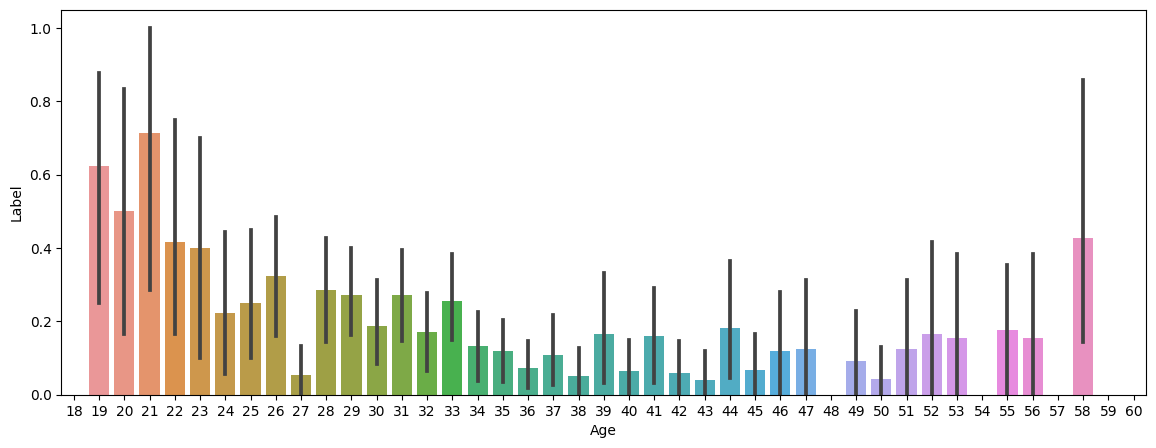

In [288]:
plt.figure(figsize=(14,5))
sns.barplot(x='Age',y='Label',data=train)

根据可视化图重设年龄分组

In [289]:
def resetAge(input):
    if ((input < 24) & (input > 18)) | (input == 58):
        return 1
    elif (input == 18) | (input == 48) |(input == 54) | (input == 57) | (input > 58) :
        return 0
    else:
        return 2

现在对薪酬进行可视化

(0.0, 19999.0)

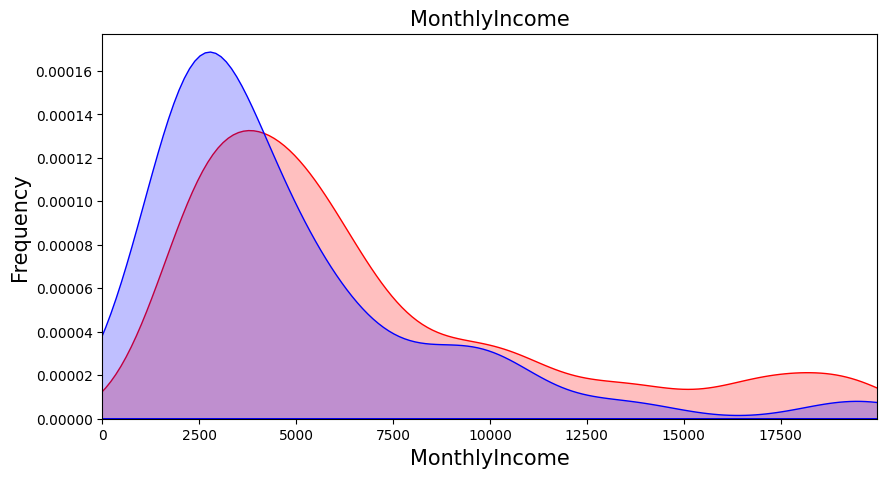

In [290]:
f,ax=plt.subplots(figsize=(10,5))
sns.kdeplot(train.loc[train['Label']==0,'MonthlyIncome'],color='red',shade=True,label='Label_0')
sns.kdeplot(train.loc[train['Label']==1,'MonthlyIncome'],color='blue',shade=True,label='Label_1')
plt.title('MonthlyIncome',fontsize=15)
plt.xlabel('MonthlyIncome',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xlim(0,train['MonthlyIncome'].max())

发现3750频率上升，之后频率下降，重设薪酬分组

In [291]:
def resetSalary(input):
    if (input>0) & (input<3725):
        return 0
    elif (input>=3725) & (input<111250):
        return 1
    else:
        return 2

现在对工资提成的离职情况分布进行可视化

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Label'>

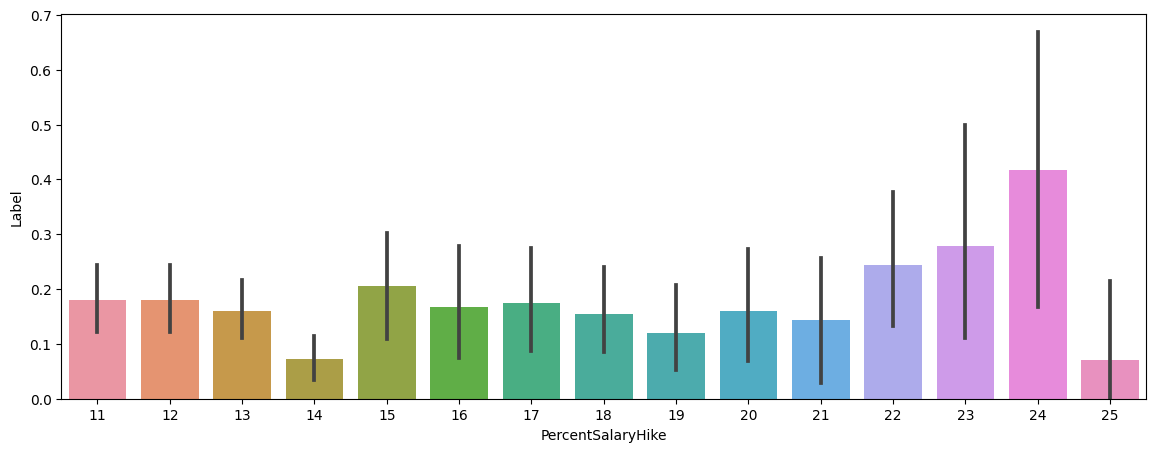

In [292]:
plt.figure(figsize=(14,5))
sns.barplot(x='PercentSalaryHike',y='Label',data=train)

22,23,24离职率较高，14,25较低
重设工资提高百分比分组

In [293]:
def resetPerHike(input):
    if (input>=22) & (input<25):
        return 0
    elif ((input>=11) & (input<14)) |((input>14) & (input <22)):
        return 1
    else:
        return 2

我猜测离职与开始工作年龄有关，对其进行构建并可视化

<AxesSubplot:xlabel='StartWorking', ylabel='Label'>

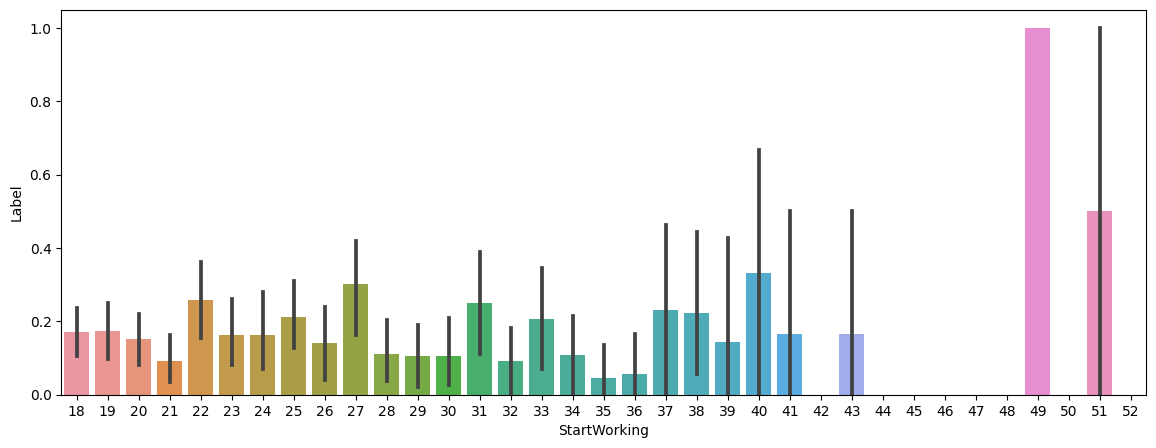

In [294]:
data['StartWorking']=data['Age']-data['TotalWorkingYears']
plt.figure(figsize=(14,5))
sns.barplot(x='StartWorking',y='Label',data=data.iloc[:train.shape[0]])

49,51较为突出，22,27,31,40，37 离职率中等，其余较低或没有数值
重设开始工作年龄分组

In [295]:
def resetStart(input):
    if (input==49)|(input==51):
        return 3
    elif (input==22)|(input==27)|(input==31)|(input==40):
        return 2
    elif (input==42)|((input>43)&(input<49))|(input==50)|(input>=52):
        return 0
    else:
        return 1

晋升时长也许也有关

<AxesSubplot:xlabel='YearsBeforeCurrentRole', ylabel='Label'>

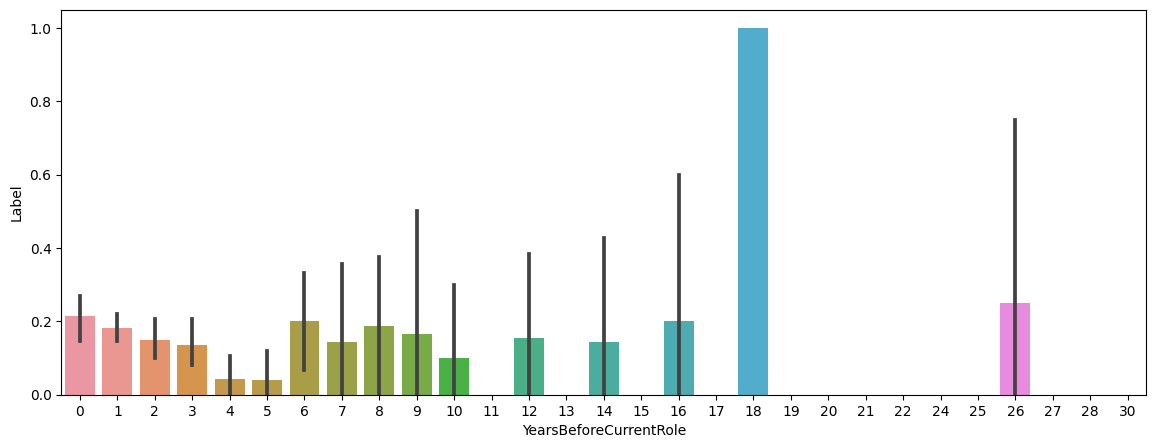

In [296]:
data['YearsBeforeCurrentRole']=data['YearsAtCompany']-data['YearsInCurrentRole']
plt.figure(figsize=(14,5))
sns.barplot(x='YearsBeforeCurrentRole',y='Label',data=data.iloc[:train.shape[0]])

18年特别突出，4,5比较小
进行重设

In [297]:
def resetYearsBefore(input):
    if (input==18):
        return 3
    elif (input<=3)|((input>=6)&(input<=10))|(input==12)|(input==14)|(input==16)|(input==26):
        return 2
    elif (input==4)|(input==5):
        return 1
    else:
        return 0

将标签重设

In [298]:
data['Age']=data['Age'].apply(resetAge)
data['MonthlyIncome']=data['MonthlyIncome'].apply(resetSalary)
data['PercentSalaryHike']=data['PercentSalaryHike'].apply(resetPerHike)
data['StartWorking']=data['StartWorking'].apply(resetStart)
data['YearsBeforeCurrentRole']=data['YearsBeforeCurrentRole'].apply(resetYearsBefore)

In [299]:
data.head()

,ID,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,StartWorking,YearsBeforeCurrentRole
0,0,2,1,4,1,2,2,3,1,1,...,0,0,0,1,0,0,1,0,1,2
1,1,0,1,4,4,3,3,3,1,7,...,0,0,0,1,0,0,1,0,1,2
2,2,2,7,3,1,1,2,3,1,1,...,0,0,0,0,0,1,0,1,1,2
3,3,2,1,1,4,2,4,4,1,1,...,0,0,0,0,1,0,1,0,1,0
4,4,2,1,3,1,2,1,2,0,1,...,0,0,0,1,0,0,1,0,2,2


对数据进行大致处理后，对特征的重要度进行排序

In [300]:
from sklearn.feature_selection import SelectKBest,f_classif
drop_columns=[]
num=train.shape[0]
target=train['Label'].values
features=data.drop(columns=['Label']).columns.tolist()
train=data.iloc[:num]
selector=SelectKBest(f_classif,k=len(features))
selector.fit(train[features],target)
scores=-np.log10(selector.pvalues_)
indices=np.argsort(scores)[::-1]
print('Features Importance')
for f in range(len(scores)):
    if scores[indices[f]]<=1.00:
        drop_columns.append(features[indices[f]])
    print('%0.2f %s'%(scores[indices[f]],features[indices[f]]))

Features Importance
18.69 OverTime_Yes
18.69 OverTime_No
10.10 MonthlyIncome
9.47 TotalWorkingYears
9.30 MaritalStatus_Single
7.75 JobLevel
7.27 YearsInCurrentRole
6.90 YearsWithCurrManager
6.50 JobRole_Sales Representative
6.18 StartWorking
5.77 YearsAtCompany
5.40 StockOptionLevel
4.56 YearsBeforeCurrentRole
4.55 PercentSalaryHike
4.53 JobSatisfaction
4.35 JobInvolvement
3.00 MaritalStatus_Divorced
2.89 EnvironmentSatisfaction
2.84 JobRole_Healthcare Representative
2.73 MaritalStatus_Married
2.48 DistanceFromHome
2.17 Department_Research & Development
2.16 BusinessTravel_Travel_Frequently
2.07 JobRole_Research Director
1.91 JobRole_Manager
1.78 Department_Sales
1.76 YearsSinceLastPromotion
1.74 JobRole_Manufacturing Director
1.71 BusinessTravel_Non-Travel
1.45 EducationField_Technical Degree
1.41 JobRole_Laboratory Technician
1.18 EducationField_Human Resources
1.10 JobRole_Human Resources
1.06 RelationshipSatisfaction
1.01 EducationField_Marketing
0.98 WorkLifeBalance
0.92 Performan

开始筛选模型

分类算法

In [301]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

num=train.shape[0]
train_val_y=train.iloc[:num]['Label']
train_val_x=data.iloc[:num].drop(columns=['Label'])
test_x=data.iloc[num:].drop('Label',axis=1)

train_x,val_x,train_y,val_y=train_test_split(train_val_y,train_val_x,test_size=0.25,
                                            random_state=2)

model={}
model['rfc']=RandomForestClassifier()
model['gdbt']=GradientBoostingClassifier()
model['cart']=DecisionTreeClassifier()
model['knn']=KNeighborsClassifier()
model['svm']=svm.SVC()
model['lr']=LogisticRegression()
for i in model:
    model[i].fit(train_val_x,train_val_y)
    score=model_selection.cross_val_score(model[i],train_val_x,train_val_y,cv=5,scoring='accuracy')
    print('%s的准确率为：%.3f(std:%.3f)'%(i,score.mean(),score.std()))

rfc的准确率为：0.858(std:0.005)
gdbt的准确率为：0.867(std:0.019)
cart的准确率为：0.778(std:0.026)
knn的准确率为：0.641(std:0.170)
svm的准确率为：0.838(std:0.002)
lr的准确率为：0.872(std:0.016)


发现lr最高，其次是gdbt，然后是rfc

对分数较高的各个模型进行调参

In [302]:
from sklearn.model_selection import GridSearchCV
model=['rfc','gbdt','svc','lr']

temp=[]
rfc=RandomForestClassifier(random_state=0)
params={'n_estimators':[50,100,150,200,250],'max_depth':[3,5,7],'min_samples_leaf':[2,4,6]}
temp.append([rfc,params])

gbt=GradientBoostingClassifier(random_state=0)
params={'learning_rate':[0.01,0.05,0.1,0.15,0.2],'n_estimators':[100,300,500],
       'max_depth':[3,5,7]}
temp.append([gbt,params])

svc=svm.SVC()
params={'kernel':['linear','rbf','sigmoid'],'C':[1,1.2,1.4,1.5,1.8,2],
       'gamma':[0.1,0.15,0.2,0.25]}
temp.append([svc,params])

lr=LogisticRegression()
params={'C':[0.01,0.1,0.5,1,2,3,4,5,6],'solver':['newton-cg','lbfgs','sag']}
temp.append([lr,params])

for i in range(len(model)):
    best_model=GridSearchCV(temp[i][0],param_grid=temp[i][1],refit=True,cv=5).fit(train_val_x,train_val_y)
    print(model[i],':')
    print('best accuracy:%.3f'%(best_model.best_score_))
    print('best parameters:',best_model.best_params_)

rfc :
best accuracy:0.856
best parameters: {'max_depth': 7, 'min_samples_leaf': 6, 'n_estimators': 250}
gbdt :
best accuracy:0.872
best parameters: {'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 500}
svc :
best accuracy:0.881
best parameters: {'C': 2, 'gamma': 0.1, 'kernel': 'linear'}
lr :
best accuracy:0.885
best parameters: {'C': 0.1, 'solver': 'newton-cg'}


集成分类模型

In [303]:
from sklearn.ensemble import VotingClassifier

models=[('rfc',RandomForestClassifier(max_depth=5,min_samples_leaf=2,n_estimators=50)),
     ('gdbt',GradientBoostingClassifier(learning_rate=0.1,max_depth=3,n_estimators=100)),
     ('svc',svm.SVC(C=1.5,gamma=0.1,kernel='linear')),
     ('lr',LogisticRegression(C=0.5,solver='sag'))]
vote=VotingClassifier(models,voting='hard')
scores=model_selection.cross_val_score(vote,train_val_x,train_val_y,cv=5,scoring='accuracy')
print('集成模型准确率为：%.3f(std:%.3f)'%(scores.mean(),scores.std()))

集成模型准确率为：0.847(std:0.006)


对比各个模型，发现lr模型准确率最高

In [311]:
model=LogisticRegression(C=0.1,solver='newton-cg').fit(train_val_x,train_val_y)
score=model_selection.cross_val_score(model,train_val_x,train_val_y,cv=10,scoring='accuracy')
result=model.predict(test_x).astype('int')

In [315]:
test_ID = test['ID']
data_predict=pd.DataFrame()
data_predict['ID'] = test_ID
data_predict['Label']=result
data_predict.to_csv('sample.csv')
#data_predict=pd.read_csv('sample.csv',index = False)